In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Buishand Range Test
def buishand_range_test(x):
    n = len(x)
    S = np.cumsum(x - np.mean(x))
    S = np.insert(S, 0, 0)  # Add zero at the beginning for ease of computation
    test_statistic = np.zeros(n)
    for k in range(1, n):
        S1 = S[k]
        S2 = S[-1] - S[k]
        test_statistic[k] = np.abs(S1 - S2)
    change_point_index = np.argmax(test_statistic) + 1
    return change_point_index, test_statistic

# Example usage
data = np.concatenate([np.random.normal(0, 1, 50), np.random.normal(5, 1, 50)])
change_point_buishand, _ = buishand_range_test(data)
print(f"Buishand Change Point: {change_point_buishand}")


Buishand Change Point: 51


In [2]:
# Pettitt Test
def pettitt_test(x):
    n = len(x)
    K = np.zeros(n)
    H = np.zeros(n)
    T = np.zeros(n)
    for k in range(n):
        K[k] = np.sum(x[:k+1])
        H[k] = np.sum(x[k+1:])
    for k in range(n):
        T[k] = np.abs(K[k] - H[k])
    change_point_index = np.argmax(T)
    return change_point_index, T

# Example usage
change_point_pettitt, _ = pettitt_test(data)
print(f"Pettitt Change Point: {change_point_pettitt}")


Pettitt Change Point: 11


In [3]:
# CUSUM (Cumulative Sum Control Chart)
def cusum_test(x):
    n = len(x)
    mean_x = np.mean(x)
    cusum = np.cumsum(x - mean_x)
    change_points = np.where(np.abs(cusum) > np.std(x) * 3)[0]
    return change_points

# Example usage
change_points_cusum = cusum_test(data)
print(f"CUSUM Change Points: {change_points_cusum}")


CUSUM Change Points: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]


In [4]:
!pip install ruptures

In [5]:
# Binary Segmentation
from ruptures import Binseg

def binary_segmentation(x):
    model = "l2"  # Model for change point detection
    algo = Binseg(model=model).fit(x)
    change_points = algo.predict(n_bkps=5)  # Detect up to 5 change points
    return change_points

# Example usage
import ruptures as rpt
change_points_binseg = binary_segmentation(data)
print(f"Binary Segmentation Change Points: {change_points_binseg}")


Binary Segmentation Change Points: [5, 10, 35, 45, 50, 100]


In [6]:
# PELT (Pruned Exact Linear Time) Algorithm
import ruptures as rpt

def pelt_algorithm(x, penalty):
    model = "l2"  # Model for change point detection
    algo = rpt.Pelt(model=model).fit(x)
    change_points = algo.predict(pen=penalty)  # Use 'pen' parameter to set the penalty
    return change_points

penalty = 10  # Adjust penalty parameter to control the number of change points
change_points_pelt = pelt_algorithm(data, penalty)
print(f"PELT Change Points: {change_points_pelt}")


PELT Change Points: [50, 100]


Detected Change Points: [1]


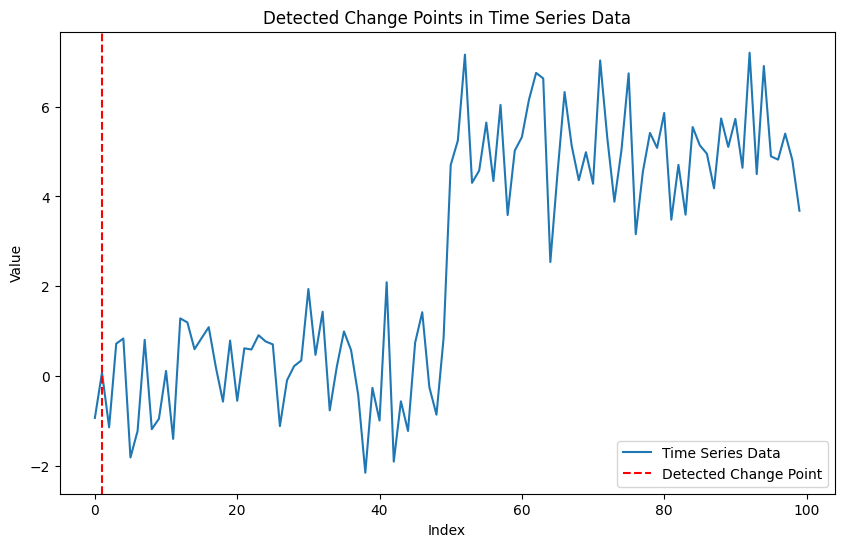

In [18]:
#  the Snedecor-Harter-Nadler (SHN) test, as implemented in the example, detects the first most significant change point based on the variance difference
def shn_test(x):
    """
    Snedecor-Harter-Nadler (SHN) Test for change-point detection in time series data.
    """
    n = len(x)
    if n < 2:
        raise ValueError("Time series data must contain at least two observations.")

    test_statistic = np.zeros(n - 1)
    for k in range(1, n):
        var1 = np.var(x[:k], ddof=1)
        var2 = np.var(x[k:], ddof=1)
        if var1 == 0 or var2 == 0:
            test_statistic[k-1] = 0
        else:
            test_statistic[k-1] = np.abs(var1 - var2) / (var1 + var2)

    change_point_index = np.argmax(test_statistic) + 1
    return change_point_index, test_statistic

def detect_change_points(x, min_segment_length=10, max_change_points=np.inf):
    """
    Detect change points in the entire data range using the SHN test.
    """
    change_points = []
    segment_start = 0
    segment_end = len(x)

    while segment_end - segment_start > min_segment_length and len(change_points) < max_change_points:
        segment = x[segment_start:segment_end]
        change_point, _ = shn_test(segment)

        if 0 < change_point < len(segment):
            change_point_index = segment_start + change_point
            change_points.append(change_point_index)

            # Update segment ranges
            segment_end = change_point_index
            if segment_end - segment_start < min_segment_length:
                break
            segment_start = change_point_index
            if len(x) - segment_start < min_segment_length:
                break
        else:
            break

    return change_points

def plot_change_points(data, change_points):
    """
    Plot the data with detected change points.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Time Series Data')
    for cp in change_points:
        plt.axvline(x=cp, color='r', linestyle='--', label='Detected Change Point' if cp == change_points[0] else "")
    plt.title('Detected Change Points in Time Series Data')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example usage

change_points = detect_change_points(data)
print(f"Detected Change Points: {change_points}")

plot_change_points(data, change_points)


Detected Sharp Change Points: [1, 4, 5, 39, 40, 44, 45, 46, 47, 48, 49, 50, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189]
Magnitudes: [5.491234724382324, 4.833175076204034, 4.8292907208547495, 5.156571979792879, 5.275496354938221, 4.895645930458525, 4.901252569171946, 4.773046478750888, 4.685972810952047, 4.671050560412523, 4.645708270830481, 4.735150836657756, 4.758226719871244, 4.73747326190986, 4.743838211118414, 4.7520876726318235, 4.82219113986476, 4.7955720389004535, 4.795388607912727, 4.729399416492262, 4.607760467063675, 4.646889633697759, 4.685459868260779, 4.672955360827515, 4.763926053834528, 4.71476797012486, 4.725604326127441, 4.739399872118881, 4.813951549504943, 4.8763389455789135, 4.895692301940727, 4

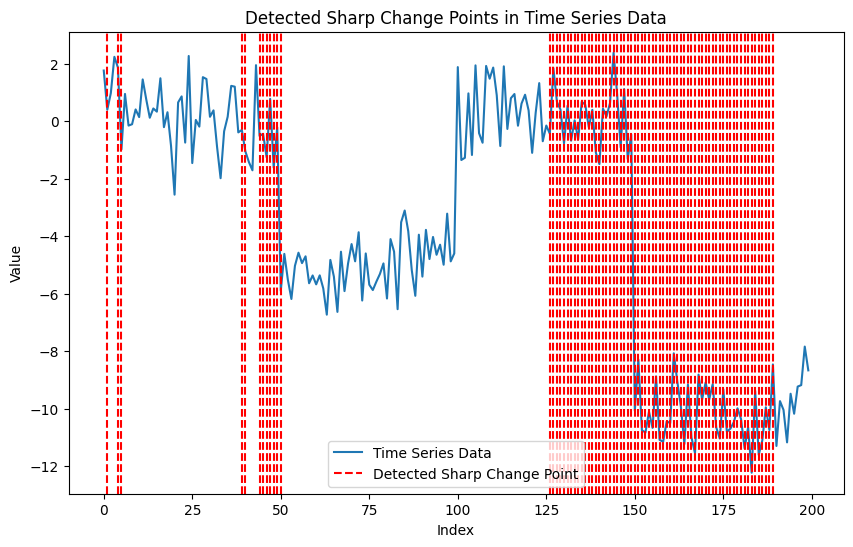

In [35]:
# SHN test combined with a magnitude filter to extract sharp change points
def shn_test(x):
    """
    Snedecor-Harter-Nadler (SHN) Test for change-point detection in time series data.
    """
    n = len(x)
    if n < 2:
        raise ValueError("Time series data must contain at least two observations.")

    test_statistic = np.zeros(n - 1)
    for k in range(1, n):
        var1 = np.var(x[:k], ddof=1)
        var2 = np.var(x[k:], ddof=1)
        if var1 == 0 or var2 == 0:
            test_statistic[k-1] = 0
        else:
            test_statistic[k-1] = np.abs(var1 - var2) / (var1 + var2)

    change_point_index = np.argmax(test_statistic) + 1
    return change_point_index, test_statistic

def detect_change_points(x, min_segment_length=10, max_change_points=np.inf):
    """
    Detect multiple change points in the entire data range using the SHN test.
    """
    change_points = []
    segments_to_process = [(0, len(x))]

    while segments_to_process and len(change_points) < max_change_points:
        segment_start, segment_end = segments_to_process.pop(0)
        if segment_end - segment_start > min_segment_length:
            segment = x[segment_start:segment_end]
            change_point, _ = shn_test(segment)

            if 0 < change_point < len(segment):
                change_point_index = segment_start + change_point
                change_points.append(change_point_index)

                # Add new segments to process
                if segment_start < change_point_index:
                    segments_to_process.append((segment_start, change_point_index))
                if change_point_index < segment_end:
                    segments_to_process.append((change_point_index, segment_end))

    return change_points

def calculate_change_magnitude(x, change_points):
    """
    Calculate the magnitude of change around detected change points.
    """
    magnitudes = []
    for i in range(len(change_points) - 1):
        start = change_points[i]
        end = change_points[i + 1]
        before_mean = np.mean(x[:start])
        after_mean = np.mean(x[end:])
        magnitude = np.abs(after_mean - before_mean)
        magnitudes.append(magnitude)
    return magnitudes

def extract_sharp_change_points(x, min_magnitude):
    """
    Extract sharp change points based on a magnitude threshold.
    """
    change_points = detect_change_points(x)
    magnitudes = calculate_change_magnitude(x, change_points)

    sharp_change_points = [cp for i, cp in enumerate(change_points[:-1]) if magnitudes[i] > min_magnitude]
    return sharp_change_points, magnitudes

def plot_change_points(data, change_points, magnitudes):
    """
    Plot the data with detected change points and magnitudes.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Time Series Data')
    for cp in change_points:
        plt.axvline(x=cp, color='r', linestyle='--', label='Detected Sharp Change Point' if cp == change_points[0] else "")
    plt.title('Detected Sharp Change Points in Time Series Data')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    np.random.seed(0)
    data = np.concatenate([
        np.random.normal(0, 1, 50),
        np.random.normal(-5, 1, 50),
        np.random.normal(0, 1, 50),
        np.random.normal(-10, 1, 50)
    ])

    min_magnitude = 5  # Threshold for defining sharp change points
    sharp_change_points, magnitudes = extract_sharp_change_points(data, min_magnitude)
    print(f"Detected Sharp Change Points: {sharp_change_points}")
    print(f"Magnitudes: {magnitudes}")

    plot_change_points(data, sharp_change_points, magnitudes)


Cox-Stuart Trend Test: A non-parametric test for detecting monotonic trends. It compares the number of positive and negative differences between paired observations.

In [37]:
# Cox-Stuart Trend Test
import numpy as np
import scipy.stats as stats

def cox_stuart_test(data):
    n = len(data)
    mid = n // 2
    x1 = data[:mid]
    x2 = data[mid:] if n % 2 == 0 else data[mid+1:]

    test_statistic = np.sum(x1 < x2) - np.sum(x1 > x2)
    p_value = 2 * min(stats.norm.cdf(test_statistic), 1 - stats.norm.cdf(test_statistic))

    return test_statistic, p_value

# Example data
data = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])
test_statistic, p_value = cox_stuart_test(data)
print(f"Cox-Stuart Test Statistic: {test_statistic}, p-value: {p_value}")


Cox-Stuart Test Statistic: 0, p-value: 1.0


Mann-Kendall Trend Test: A popular non-parametric test to identify trends over time in a time series. It tests for monotonic trends without specifying whether the trend is linear or not.

In [38]:
from scipy.stats import rankdata

def mann_kendall_test(data):
    n = len(data)
    ranks = rankdata(data)
    S = np.sum([np.sum(ranks[i:] < ranks[j]) for i in range(n) for j in range(i+1, n)])
    var_S = (n * (n - 1) * (2 * n + 5)) / 18
    Z = (S - (n * (n - 1) / 4)) / np.sqrt(var_S)
    p_value = 2 * (1 - stats.norm.cdf(np.abs(Z)))

    return Z, p_value

# Example data
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
Z, p_value = mann_kendall_test(data)
print(f"Mann-Kendall Z Statistic: {Z}, p-value: {p_value}")


Mann-Kendall Z Statistic: 10.634235116910814, p-value: 0.0


In [39]:
from scipy.stats import linregress

def sens_slope(data):
    n = len(data)
    slopes = []
    for i in range(n):
        for j in range(i+1, n):
            slope = (data[j] - data[i]) / (j - i)
            slopes.append(slope)
    return np.median(slopes)

# Example data
data = np.array([1, 3, 2, 5, 4, 6, 8, 7])
slope = sens_slope(data)
print(f"Sen's Slope: {slope}")


Sen's Slope: 1.0


In [45]:
from scipy.stats import rankdata

def robust_rank_order_test(data1, data2):
    combined = np.concatenate([data1, data2])
    ranks = rankdata(combined)
    rank1 = ranks[:len(data1)]
    rank2 = ranks[len(data1):]
    U1 = np.sum(rank1) - len(data1) * (len(data1) + 1) / 2
    U2 = np.sum(rank2) - len(data2) * (len(data2) + 1) / 2
    U = np.abs(U1 - U2) / np.sqrt(len(data1) * len(data2) * (len(combined) + 1) / 12)

    return U

# Example data
data1 = np.random.normal(0, 1, 50)
data2 = np.random.normal(1, 1, 50)
U = robust_rank_order_test(data1, data2)
print(f"Robust Rank-Order Test Statistic: {U}")


Robust Rank-Order Test Statistic: 8.203645651793964


In [53]:
from scipy.stats import norm
def buishand_range_test(data):
    n = len(data)
    mean = np.mean(data)
    cumulative_sum = np.cumsum(data - mean)
    R = np.max(cumulative_sum) - np.min(cumulative_sum)
    R_bar = R / np.sqrt(np.var(data) * n)

    # Approximate p-value (for normal distribution)
    p_value = 1 - norm.cdf(R_bar)

    return R_bar, p_value

# Example data
data = np.concatenate([np.random.normal(0, 1, 50), np.random.normal(5, 1, 50)])
R_bar, p_value = buishand_range_test(data)
print(f"Buishand Range Test Statistic: {R_bar}, p-value: {p_value}")



Buishand Range Test Statistic: 4.630642295015429, p-value: 1.8226658103914772e-06


In [42]:
def bartels_rank_test(data):
    n = len(data)
    ranks = rankdata(data)
    R = np.sum(np.diff(ranks) ** 2) / (n * (n - 1))

    return R

# Example data
data = np.random.normal(0, 1, 100)
R = bartels_rank_test(data)
print(f"Bartels Rank von Neumann's Ratio Test Statistic: {R}")


Bartels Rank von Neumann's Ratio Test Statistic: 16.825454545454544


In [51]:
# Wald-Wolfowitz Test: A non-parametric test for randomness that compares the observed sequence of data to a random permutation.
from scipy.stats import norm

def wald_wolfowitz_test(data1, data2):
    combined = np.concatenate([data1, data2])
    ranks = rankdata(combined)
    rank1 = ranks[:len(data1)]
    rank2 = ranks[len(data1):]
    U1 = np.sum(rank1) - len(data1) * (len(data1) + 1) / 2
    U2 = np.sum(rank2) - len(data2) * (len(data2) + 1) / 2
    U = np.abs(U1 - U2) / np.sqrt(len(data1) * len(data2) * (len(combined) + 1) / 12)

    # Approximate p-value
    p_value = 2 * (1 - norm.cdf(np.abs(U)))

    return U, p_value

# Example data
data1 = np.random.normal(0, 1, 50)
data2 = np.random.normal(1, 1, 50)
U, p_value = wald_wolfowitz_test(data1, data2)
print(f"Wald-Wolfowitz Test Statistic: {U}, p-value: {p_value}")



Wald-Wolfowitz Test Statistic: 7.224723229479054, p-value: 5.020428517354958e-13


In [44]:
from scipy.stats import rankdata

def robust_rank_order_test(data1, data2):
    combined = np.concatenate([data1, data2])
    ranks = rankdata(combined)
    rank1 = ranks[:len(data1)]
    rank2 = ranks[len(data1):]
    U1 = np.sum(rank1) - len(data1) * (len(data1) + 1) / 2
    U2 = np.sum(rank2) - len(data2) * (len(data2) + 1) / 2
    U = np.abs(U1 - U2) / np.sqrt(len(data1) * len(data2) * (len(combined) + 1) / 12)

    return U

# Example data
data1 = np.random.normal(0, 1, 50)
data2 = np.random.normal(1, 1, 50)
U = robust_rank_order_test(data1, data2)
print(f"Robust Rank-Order Test Statistic: {U}")


Robust Rank-Order Test Statistic: 8.465610807061335
